In [1]:
# pip install pandas

In [2]:
# pip install matplotlib

In [3]:
# pip install seaborn

In [4]:
#pip install numpy

In [5]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.preprocessing import  OneHotEncoder

trainD = pd.read_csv('train.csv')
testD = pd.read_csv('test.csv')
#actual_price = pd.read_csv('sample_submission.csv')

In [7]:
data_train = trainD
select = ['MSSubClass','LotConfig','OverallQual','GrLivArea','TotalBsmtSF','BsmtFinSF1','2ndFlrSF','GarageArea','1stFlrSF','YearBuilt']
data_train = data_train[select]
data_train

,MSSubClass,LotConfig,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt
0,60,Inside,7,1710,856,706,854,548,856,2003
1,20,FR2,6,1262,1262,978,0,460,1262,1976
2,60,Inside,7,1786,920,486,866,608,920,2001
3,70,Corner,7,1717,756,216,756,642,961,1915
4,60,FR2,8,2198,1145,655,1053,836,1145,2000
...,...,...,...,...,...,...,...,...,...,...
1455,60,Inside,6,1647,953,0,694,460,953,1999
1456,20,Inside,6,2073,1542,790,0,500,2073,1978
1457,70,Inside,7,2340,1152,275,1152,252,1188,1941
1458,20,Inside,5,1078,1078,49,0,240,1078,1950


In [8]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['LotConfig'])
X_train=one_hot_encoded_data

In [9]:
X_train

,MSSubClass,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,7,1710,856,706,854,548,856,2003,0,0,0,0,1
1,20,6,1262,1262,978,0,460,1262,1976,0,0,1,0,0
2,60,7,1786,920,486,866,608,920,2001,0,0,0,0,1
3,70,7,1717,756,216,756,642,961,1915,1,0,0,0,0
4,60,8,2198,1145,655,1053,836,1145,2000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,1647,953,0,694,460,953,1999,0,0,0,0,1
1456,20,6,2073,1542,790,0,500,2073,1978,0,0,0,0,1
1457,70,7,2340,1152,275,1152,252,1188,1941,0,0,0,0,1
1458,20,5,1078,1078,49,0,240,1078,1950,0,0,0,0,1


In [10]:
Y_train = trainD['SalePrice']

In [11]:
Y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [12]:
# make sure do not have nullvalue
X_train.isnull().sum() 

MSSubClass           0
OverallQual          0
GrLivArea            0
TotalBsmtSF          0
BsmtFinSF1           0
2ndFlrSF             0
GarageArea           0
1stFlrSF             0
YearBuilt            0
LotConfig_Corner     0
LotConfig_CulDSac    0
LotConfig_FR2        0
LotConfig_FR3        0
LotConfig_Inside     0
dtype: int64

In [13]:
Y_train.isnull().sum() 

0

In [14]:
# preprocesing for the test data

In [15]:
data_test = testD[select]
data_test

,MSSubClass,LotConfig,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt
0,20,Inside,5,896,882.0,468.0,0,730.0,896,1961
1,20,Corner,6,1329,1329.0,923.0,0,312.0,1329,1958
2,60,Inside,5,1629,928.0,791.0,701,482.0,928,1997
3,60,Inside,6,1604,926.0,602.0,678,470.0,926,1998
4,120,Inside,8,1280,1280.0,263.0,0,506.0,1280,1992
...,...,...,...,...,...,...,...,...,...,...
1454,160,Inside,4,1092,546.0,0.0,546,0.0,546,1970
1455,160,Inside,4,1092,546.0,252.0,546,286.0,546,1970
1456,20,Inside,5,1224,1224.0,1224.0,0,576.0,1224,1960
1457,85,Inside,5,970,912.0,337.0,0,0.0,970,1992


In [16]:
X_test = pd.get_dummies(data_test, columns = ['LotConfig'])
X_test

,MSSubClass,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,20,5,896,882.0,468.0,0,730.0,896,1961,0,0,0,0,1
1,20,6,1329,1329.0,923.0,0,312.0,1329,1958,1,0,0,0,0
2,60,5,1629,928.0,791.0,701,482.0,928,1997,0,0,0,0,1
3,60,6,1604,926.0,602.0,678,470.0,926,1998,0,0,0,0,1
4,120,8,1280,1280.0,263.0,0,506.0,1280,1992,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,1092,546.0,0.0,546,0.0,546,1970,0,0,0,0,1
1455,160,4,1092,546.0,252.0,546,286.0,546,1970,0,0,0,0,1
1456,20,5,1224,1224.0,1224.0,0,576.0,1224,1960,0,0,0,0,1
1457,85,5,970,912.0,337.0,0,0.0,970,1992,0,0,0,0,1


In [17]:
X_test.isnull().sum() 

MSSubClass           0
OverallQual          0
GrLivArea            0
TotalBsmtSF          1
BsmtFinSF1           1
2ndFlrSF             0
GarageArea           1
1stFlrSF             0
YearBuilt            0
LotConfig_Corner     0
LotConfig_CulDSac    0
LotConfig_FR2        0
LotConfig_FR3        0
LotConfig_Inside     0
dtype: int64

In [18]:
#Eliminate null values from tables
X_test= X_test.fillna(0)
X_test

,MSSubClass,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,20,5,896,882.0,468.0,0,730.0,896,1961,0,0,0,0,1
1,20,6,1329,1329.0,923.0,0,312.0,1329,1958,1,0,0,0,0
2,60,5,1629,928.0,791.0,701,482.0,928,1997,0,0,0,0,1
3,60,6,1604,926.0,602.0,678,470.0,926,1998,0,0,0,0,1
4,120,8,1280,1280.0,263.0,0,506.0,1280,1992,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,1092,546.0,0.0,546,0.0,546,1970,0,0,0,0,1
1455,160,4,1092,546.0,252.0,546,286.0,546,1970,0,0,0,0,1
1456,20,5,1224,1224.0,1224.0,0,576.0,1224,1960,0,0,0,0,1
1457,85,5,970,912.0,337.0,0,0.0,970,1992,0,0,0,0,1


In [19]:
X_test.isnull().sum() 

MSSubClass           0
OverallQual          0
GrLivArea            0
TotalBsmtSF          0
BsmtFinSF1           0
2ndFlrSF             0
GarageArea           0
1stFlrSF             0
YearBuilt            0
LotConfig_Corner     0
LotConfig_CulDSac    0
LotConfig_FR2        0
LotConfig_FR3        0
LotConfig_Inside     0
dtype: int64

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
# XGboost class
import xgboost as xgb

class XGboost:
    def __init__(self, x_train, y_train, x_test):
        self.x_train = x_train
        self.y_train = y_train
        
        
        self.x_test = x_test
        #self.y_test = y_test
        
        y_test_predict = self.predict()
        
        self.plot1(y_test_predict)
        self.plot2(y_test_predict)
        print("The final predict result for the price of house is:",y_test_predict)
        
        #self.error(y_test_predict)

    def predict(self):
        model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
        
        model_xgb.fit(self.x_train,self.y_train)
        xgb_train_pred = model_xgb.predict(self.x_test)
        xgb_pred = np.expm1(model_xgb.predict(self.x_test))
        return xgb_train_pred
    def plot1(self, y_test_predict):
     
        test_dates = self.x_test.index     
        
        fig, ax = plt.subplots()
        ax.scatter(test_dates,y_test_predict, color='tab:red')
        #ax.scatter(test_dates,y_test, color='tab:blue')
        plt.title("The final Prediction for the house price")
        plt.show()
    def plot2(self, y_test_predict):

            test_dates = self.x_test.index     

            fig, ax = plt.subplots()
            r1 = []
            r2 = []
            r3 = []
            r4 = []
            r5 = []
            for i in range(0,len(y_test_predict)):
                #print(y_test_predict[i])
                if y_test_predict[i]<= 100000:
                    r1.append(y_test_predict[i])
                elif 100000 <y_test_predict[i] and y_test_predict[i]<= 200000:
                    r2.append(y_test_predict[i])
                elif 200000 <y_test_predict[i] and y_test_predict[i]<= 300000:
                    r3.append(y_test_predict[i])
                elif 300000 <y_test_predict[i] and y_test_predict[i]<= 400000:
                    r4.append(y_test_predict[i])
                else:
                    r5.append(y_test_predict[i])
            print("r1:",len(r1),"r2:",len(r2),"r3:",len(r3),"r4:",len(r4),"r5:",len(r5))
            plt.pie([len(r1), len(r2),len(r3),len(r4),len(r5)], labels=["< $100000", "$100000-$200000","$200000 - $300000","$300000 - $400000",">$400000"],explode=(0.1,0.1,0.1,0.1,0.1))
            plt.title("The final Prediction price for pie chart")
            plt.show()
    def error(self,y_test_predict):
        score = r2_score(y_test_predict,self.y_test)
        self.score = score
        print ('the r2 score is :', score)
        return score

[13:42:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



/var/folders/dc/xc8218h14cxbs8nd556jkkc00000gn/T/ipykernel_3435/2404904367.py:31: RuntimeWarning: overflow encountered in expm1
  xgb_pred = np.expm1(model_xgb.predict(self.x_test))


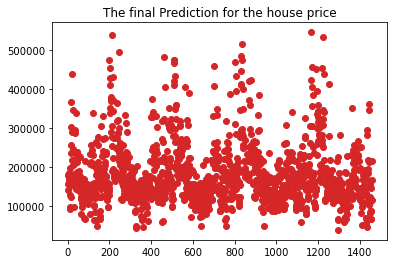

r1: 112 r2: 926 r3: 300 r4: 83 r5: 38


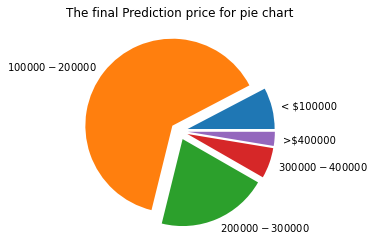

The final predict result for the price of house is: [142024.38  156192.7   180141.34  ... 166701.22  115612.164 214667.   ]



In [50]:
xgboost_predict = XGboost(X_train,Y_train,X_test)
print()
